<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 216
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DD LV grade      215 non-null    object 
 1   LALSr            215 non-null    float64
 2   LACSr            215 non-null    float64
 3   LAATr            215 non-null    float64
 4   LALScd           215 non-null    float64
 5   LACScd           215 non-null    float64
 6   LAATcd           215 non-null    float64
 7   LALSct           215 non-null    float64
 8   LACSct           215 non-null    float64
 9   LAATct           215 non-null    float64
 10  Vol max ml/m2    215 non-null    float64
 11  Vol p ml /m2     215 non-null    float64
 12  Vol preA ml /m2  215 non-null    float64
 13  Vol min ml/m2    215 non-null    float64
 14  TEF%             215 non-null    float64
 15  DDF grade        215 non-null    int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 28.6+ KB
Non

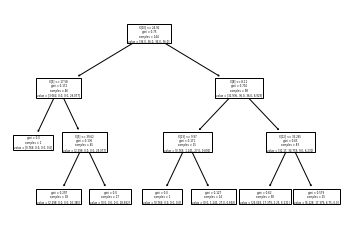

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import mglearn
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_ddf = pd.read_csv('data_DDF.csv', delimiter=';')
data_ddf = data_ddf.iloc[:, np.r_[33, 40:49, 59:64]]
data_ddf = data_ddf.dropna()
data_ddf['DDF grade'] = data_ddf['DD LV grade']
replace_valuer = {0:'normal', 1:'DDF 1', 2:'DDF 2', 3:'DDF 3'}
data_ddf = data_ddf.replace({'DD LV grade':replace_valuer})
print(data_ddf.info())
print(data_ddf['DD LV grade'].value_counts())
featur_names = data_ddf.loc[0:, 'LALSr':'TEF%'].columns
print(featur_names)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

data = data_ddf.loc[0:, 'LALSr':'TEF%']
target_names = data_ddf['DD LV grade']

X_train, X_test, y_train, y_test = train_test_split(data, target_names, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = knn.predict(X_test)
print("Метод k-ближайших соседей")
print('Правильность на тестовом наборе = ', knn.score(X_test, y_test))
print('Правильность на тренировочном наборе = ', knn.score(X_train, y_train))
print(classification_report(y_test, y_pred))

x = data_ddf.loc[0:, 'LALSr' : 'TEF%']
y = data_ddf['DDF grade']
X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.8, random_state=42)
scaler = StandardScaler()
lr = LinearRegression().fit(X_train, y_train)

print('Линейная регрессия')
print("train", lr.score(X_train, y_train))
print("test", lr.score(X_test, y_test))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print('Гребневая регрессия')
print('test ', ridge.score(X_test, y_test))
print('train', ridge.score(X_train, y_train))

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print('lasso регрессия')
print('test ', lasso.score(X_test, y_test))
print('train', lasso.score(X_train, y_train))
print('количество испльзованныз признаков ', np.sum(lasso.coef_ != 0))


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
x = data_ddf.loc[0:, 'LALSr' : 'TEF%']
y = data_ddf['DD LV grade']
X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.67, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model = LogisticRegression(solver='newton-cg', C=1.0, multi_class='ovr', class_weight='balanced', random_state=0)
model.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
print('Мультиноминальная логистическая регрессия')
print('точность модели на тренировочном наборе ', model.score(X_train, y_train))
print('точность модели на тестовом наборе ', model.score(X_test, y_test))
print(classification_report(y_test, y_pred))


from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
x = data_ddf.loc[0:, 'LALSr' : 'TEF%']
y = data_ddf['DD LV grade']
X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.67, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model_svm = svm.SVC(C=10, kernel='linear', max_iter=-1, class_weight='balanced')
model_svm.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model_svm.predict(X_test)
print('Классификатор опорных векторов - линейное ядро')
print('точность модели на тренировочном наборе ', model_svm.score(X_train, y_train))
print('точность модели на тестовом наборе ', model_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.67, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model_svm = svm.SVC(kernel='rbf', gamma=0.7, C=10, class_weight='balanced')
model_svm.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model_svm.predict(X_test)
print('Классификатор опорных векторов - ядро радиальной базовой функции')
print('точность модели на тренировочном наборе ', model_svm.score(X_train, y_train))
print('точность модели на тестовом наборе ', model_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.67, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
model_svm = svm.SVC(kernel='poly', degree=3, gamma='auto', C=10, class_weight='balanced')
model_svm.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model_svm.predict(X_test)
print('Классификатор опорных векторов - полиноминальное ядро')
print('точность модели на тренировочном наборе ', model_svm.score(X_train, y_train))
print('точность модели на тестовом наборе ', model_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred))


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split (x, y, train_size=0.67, random_state=9)
model_tree = DecisionTreeClassifier(max_depth=3, max_features=5, random_state=42, class_weight='balanced')
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
print('Классификатор дерево решений')
print('точность модели на тренировочном наборе ', model_tree.score(X_train, y_train))
print('точность модели на тестовом наборе ', model_tree.score(X_test, y_test))
print(classification_report(y_test, y_pred))
#print("Важности признаков:\n{}".format(model_tree.feature_importances_))
for name, score in zip(featur_names, model_tree.feature_importances_):
    print(name, score)
    
tree.plot_tree(model_tree)
plt.show()
    

